<a href="https://colab.research.google.com/github/nathil/Atividade-Projeto-de-Algoritmos/blob/main/Trabalhos/Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Matemática Computacional* - ***Atividade 1***

*O vigente notebook tem como objetivo aplicar as matrizes tranformação de
rotação e shear (cisalhamento), além disso, também realizaremos o cálculo do determinante e a sua representação visual .*

Com isso, utilizaremos as seguintes bibliotecas:
* `numpy` para executar as operações matemáticas e criação de arrays.
* `matplotlib` para desenhar os gráficos que serão utilizados.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

### **Função Para Desenhar o Gráfico**

In [79]:
colors = ['#fc3468', '#e403dc']

def plot_graph(list_vet, name_graph, formas=[]):

  plt.figure(figsize = (6,6))

  plt.title(name_graph)

  #Confingurando os intervalos do gráfico
  plt.axis([-5,5,-5,5])

  plt.xticks(range(-5, 6))
  plt.yticks(range(-5, 6))

  #Definido as linhas horizontais e verticais do gráfico
  plt.axhline(0)
  plt.axvline(0)

  #Iterando para desenhar cada reta
  for i, vet in enumerate(list_vet):
    plt.arrow(0,0, vet[0], vet[1], head_width=0.2, head_length=0.2, fc=colors[i % len(colors)], ec=colors[i % len(colors)], length_includes_head = True, zorder = 3)
    position_x = vet[0] + 0.2
    position_y = vet[1] + 0.2 if vet[0] >= 0 else vet[0] - 0.2
    plt.text(position_x, position_y, f"{int(vet[0]), int(vet[1])}", color=colors[i])

  #Desenhando o determinante

  for i, form in enumerate(formas):
    plt.plot(form[0],form[1],color='blue',linestyle='-')

  plt.grid()
  plt.show()

# **Função Determinante**

In [80]:
def gerar_det(vet1, vet2):
  vet1 = np.array(vet1)
  vet2 = np.array(vet2)
  x_coord = []
  y_coord = []
  rect = [(0,0),vet2,(vet1+vet2),vet1,(0,0)]

  for vet in rect:
    x_coord.append(vet[0])
    y_coord.append(vet[1])

  return x_coord, y_coord

### **Função Produto** - *Transformação Linear*

In [71]:
#a matriz multiplica cada vetor para obtermos a rotação desejada
def dot(vet1, vet2, matriz):
  return np.dot(matriz, vet1), np.dot(matriz, vet2)

### **Vetores Unitários** - *Rotação 90º*

Para fazer a rotação em **90º** e o Shear (**Cisalhamento**), vamos utilizar os seguintes vetores unitários:

$$
\hat{i} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

$$
\hat{j} = \begin{pmatrix}
0 \\
1
\end{pmatrix}
$$

Desenhando gráfico, teremos:

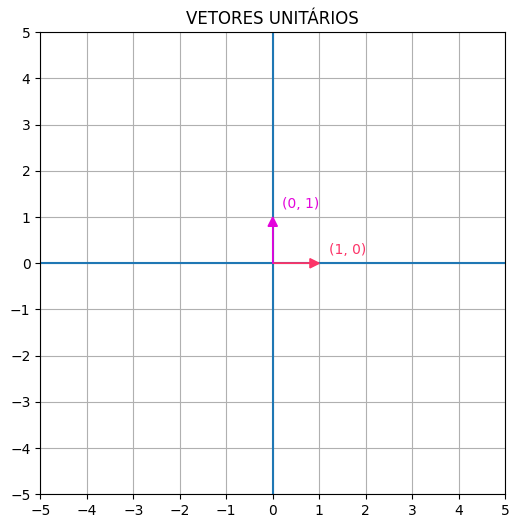

In [5]:
plot_graph([[1,0], [0,1]], 'VETORES UNITÁRIOS')

Portanto, quando os vetores $\hat{i}$ e $\hat{j}$ sofrerem uma rotação de 90º no eixo x, teremos os seguintes vetores, que será uma base para futuras rotações:

$$
\hat{i} = \begin{pmatrix}
0 \\
-1
\end{pmatrix}
$$

$$
\hat{j} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

Desenhando os valores no gráfico:

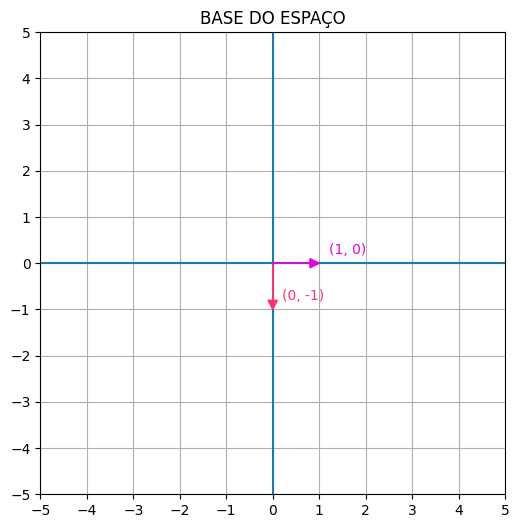

In [6]:
plot_graph([[0,-1],[1,0]], 'BASE DO ESPAÇO')

Sendo assim, a partir das bases adquiridas nós teremos a seguinte matriz de rotação:

$$
\ M_B= \begin{pmatrix}
0 & 1\\
-1 & 0
\end{pmatrix}
$$

### **Vetores Unitários** - *Shear (Cisalhamento)*

Teremos dois vetores unitários, nos quais aplicaremos o cisalhamento, que são os já utilizados anteriormente:

$$
\hat{i} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

$$
\hat{j} = \begin{pmatrix}
0 \\
1
\end{pmatrix}
$$

Desenhando os valores no gráfico:

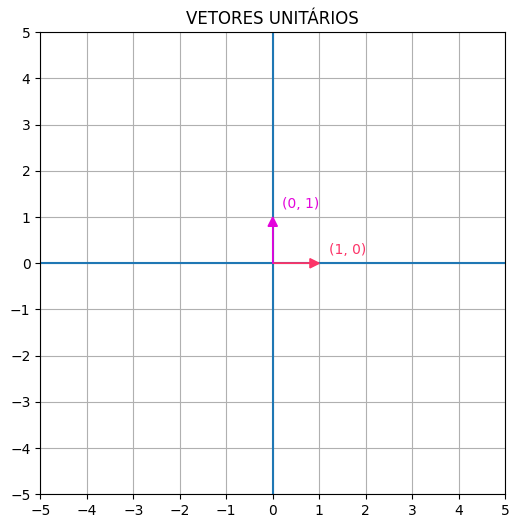

In [7]:
plot_graph([[1,0],[0,1]], 'VETORES UNITÁRIOS')

Escolhendo um fator de cisalhamento 2, ou seja, iremos alterar o eixo x (cisalhamento na horizontal), que é representado pelo velor $\hat{j}$, temos os seguites vetores:

$$
\hat{i} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

$$
\hat{j} = \begin{pmatrix}
2 \\
1
\end{pmatrix}
$$

Desenhando no gráfico:

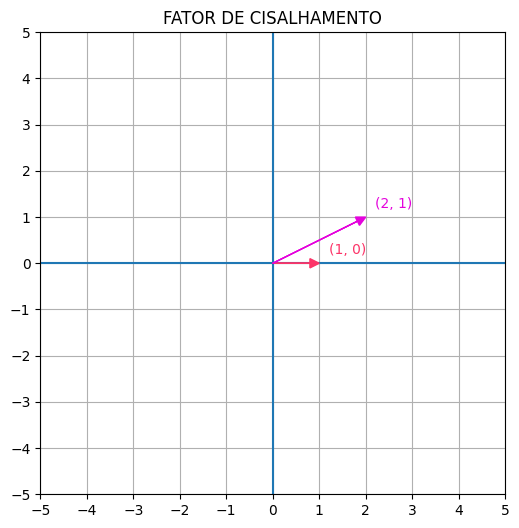

In [8]:
plot_graph([[1,0],[2,1]], 'FATOR DE CISALHAMENTO')

Sendo assim, a partir das bases adquiridas nós teremos a seguinte matriz de cisalhamento:

$$
M_B = \begin{pmatrix}
1 & 2 \\
0 & 1
\end{pmatrix}
$$

# **Rotação 90º e Shear (*Cisalhamento*)** - Aplicando em Vetores Arbitrários

Sendo assim, vamos aplicar as duas transformações nos seguintes vetores arbitrários:

$$
\hat{i}= \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

$$
\hat{j}= \begin{pmatrix}
0 \\
1
\end{pmatrix}
$$

Desenhando no gráfico:

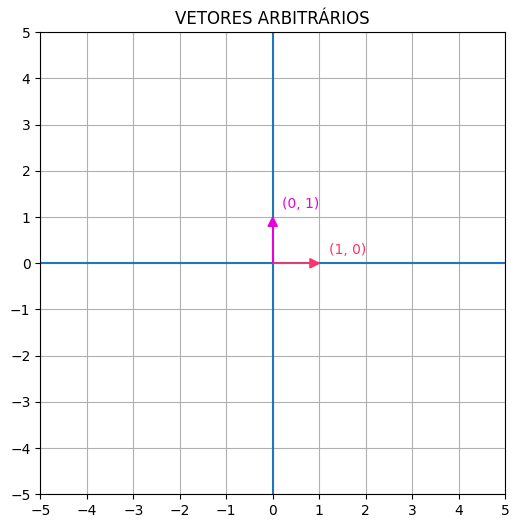

In [51]:
plot_graph([[1,0], [0,1]], 'VETORES ARBITRÁRIOS')

Com isso, podemos aplicar a rotação e o cisalhamento

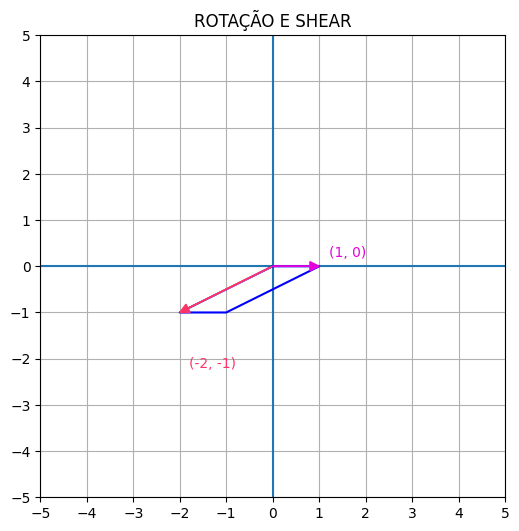

In [81]:
#Aplicando a rotação
vetor1, vetor2 = dot([1,0],[0,1], [[0,1],[-1,0]])

#Aplicando o shear nos vetores já modificados
vetor3, vetor4 = dot(vetor1, vetor2, [[1,2],[0,1]])

#Gerando o determinante
det = gerar_det(vetor3, vetor4)

plot_graph([vetor3, vetor4], 'ROTAÇÃO E SHEAR', [det])

# **Determinante**

In [56]:
determinante = np.linalg.det([vetor3, vetor4])
print(determinante)

1.0


Como o determinante é positivo, podemos observar que a orientação do espaço foi mantida mesmo após a aplicação do shear (cisalhamento).

#**Invertendo a ordem das rotações**

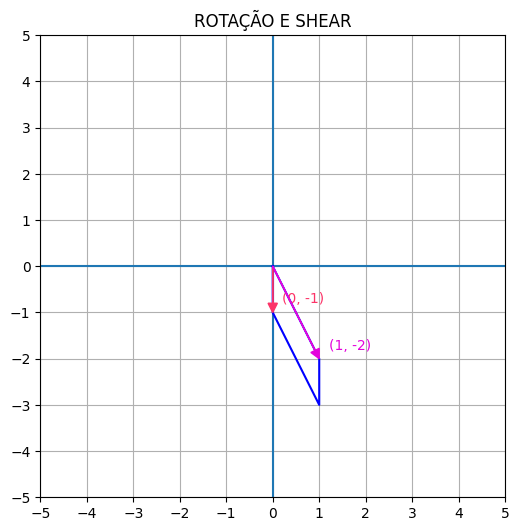

In [82]:
#Aplicando o shear
vetor1, vetor2 = dot([1,0],[0,1], [[1,2],[0,1]])

#Aplicando a rotação nos vetores já modificados
vetor3, vetor4 = dot(vetor1,vetor2, [[0,1],[-1,0]])

#Gerando o determinante
det = gerar_det(vetor3, vetor4)

plot_graph([vetor3, vetor4], 'ROTAÇÃO E SHEAR', [det])

# **Determinante** - *Transformações Invertidas*

In [58]:
determinante = np.linalg.det([vetor3, vetor4])
print(determinante)

1.0


Como o determinante é positivo, podemos observar que a orientação do espaço foi mantida mesmo após a aplicação do shear (cisalhamento). Deste modo, mesmo que a ordem das transformações tenham sido invertidas, o valor do determinante se manteve intacto. Além disso, podemos observar que a área do determinante também sofre o shear e fica em 'paralelo'.

# **Produto Escalar** - *Vetor Inicial e Vetor Rotacionado*

Para rotacionar escolheremos um vetor arbitrário, como por exemplo:

$$
\hat{i} = \begin{pmatrix}
3 \\
2
\end{pmatrix}
$$

Desenhando no gráfico:

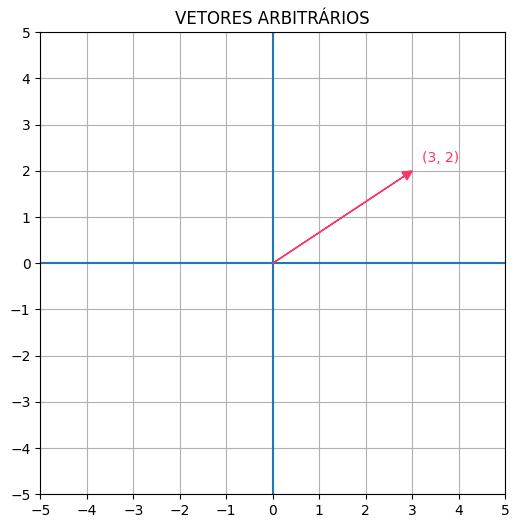

In [83]:
plot_graph([[3,2]], 'VETORES ARBITRÁRIOS')

Rotacionando o vetor a partir da matriz de rotação:

$$
\ M_B= \begin{pmatrix}
0 & 1\\
-1 & 0
\end{pmatrix}
$$

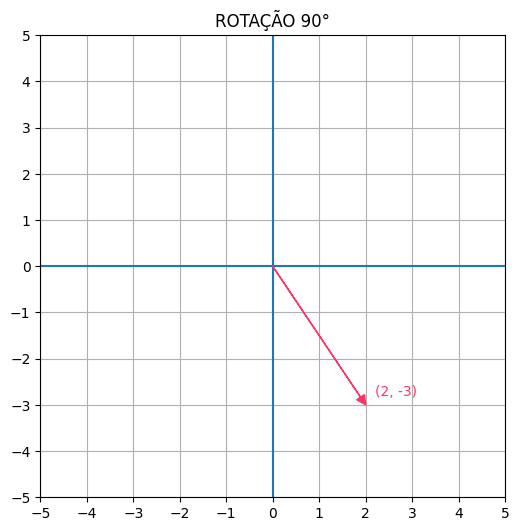

In [84]:
vetor1= np.dot([[0,1],[-1,0]],[3,2])

plot_graph([vetor1], 'ROTAÇÃO 90°')

Agora faremos o produto escalar entre os dois vetores:

$$
\hat{i} = \begin{pmatrix}
3 \\
2
\end{pmatrix}
$$

$$
\hat{j} = \begin{pmatrix}
2 \\
-3
\end{pmatrix}
$$

In [50]:
prod_escalar = np.dot([3,2], [2,-3])

#Mostrando o resultado do produto:

print(prod_escalar)


0


Deste modo, com o resultado do produto escalar entre os dois vetores sendo 0, podemos observar que, esse resultado ocorre *apenas* quando os vetores são *ortogonais*, ou seja, quando formam um ângulo de 90º entre si. Isso afirma o processo que fizemos antes de calcular o produto escalar, no qual escolhemos um vetor árbitrario e calculamos o vetor resultante da sua rotação em 90º e multiplicamos os dois vetores, o que resultou em 0.

# **Conclusão**

A partir dos cálculos e das representações visuais feitas podemos concluir que podemos aplicar em dois vetores transformações lineares em ordens inversas que o resultado do seu determinante ainda será o mesmo, por mais que os vetores em si tenham sofrido alterações, e área desse determinante também sofrerá o cisalhamento. Além disso, também podemos compreender o que significa quando o determinante é igual 0, que é resultado de um produto linear entre vetores ortogonais, ou seja, vetores que possuem um ângulo de 90º entre si.  